# Reuters Dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
 len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [6]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [7]:
train_labels[10]

3

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 265us/step - loss: 2.5429 - acc: 0.5232 - val_loss: 1.7108 - val_acc: 0.6250
Epoch 2/20
7982/7982 [==============================] - 1s 135us/step - loss: 1.4051 - acc: 0.7021 - val_loss: 1.3083 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.0545 - acc: 0.7762 - val_loss: 1.1566 - val_acc: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.8414 - acc: 0.8217 - val_loss: 1.0684 - val_acc: 0.7680
Epoch 5/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.6765 - acc: 0.8598 - val_loss: 0.9937 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.5457 - acc: 0.8872 - val_loss: 0.9544 - val_acc: 0.7970
Epoch 7/20
7982/7982 [============

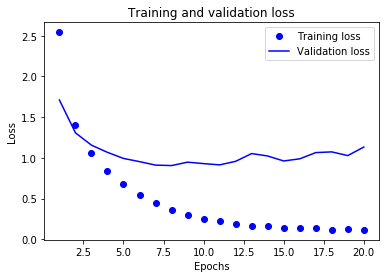

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

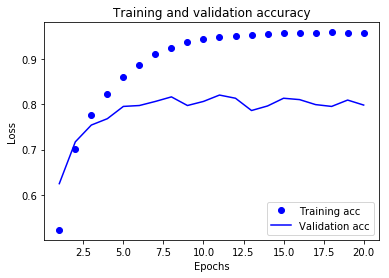

In [16]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 164us/step - loss: 2.7290 - acc: 0.5197 - val_loss: 1.7769 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 139us/step - loss: 1.4475 - acc: 0.7033 - val_loss: 1.3154 - val_acc: 0.7090
Epoch 3/9
7982/7982 [==============================] - 1s 166us/step - loss: 1.0615 - acc: 0.7745 - val_loss: 1.1233 - val_acc: 0.7650
Epoch 4/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.8239 - acc: 0.8280 - val_loss: 1.0454 - val_acc: 0.7770
Epoch 5/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.6635 - acc: 0.8622 - val_loss: 0.9661 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.5340 - acc: 0.8875 - val_loss: 0.9240 - val_acc: 0.8040
Epoch 7/9
7982/7982 [==============================] - 1s 183us/step - loss: 0.4365 - acc: 0.9075 - val_loss: 0.9037 - val_acc: 0.8130
Epoch 8

In [18]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 113us/step


In [19]:
results

[1.0180883439438533, 0.7796081923419412]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19100623330365094

In [0]:
predictions = model.predict(x_test)